## Weather Data EDA

This notebook includes the perform of EDA on weather dataset. The EDA would help us understand the radiation and temperature in data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
import os
path = '/Users/aaronpapa/Desktop/Fall 2022/Fall2022CapstoneProject/data/'
path

'/Users/aaronpapa/Desktop/Fall 2022/Fall2022CapstoneProject/data/'

In [3]:
# read weather data
weather_df = pd.read_csv(path+"weather_data.csv")

In [4]:
weather_df.isna().sum().sum()

0

In [5]:
new_weather_cL = []
for c in weather_df.columns:
    if c[:2] == 'DE' or c in ["utc_timestamp"]:
        new_weather_cL.append(c)
weather = weather_df[new_weather_cL]

In [6]:
weather.columns

Index(['utc_timestamp', 'DE_temperature', 'DE_radiation_direct_horizontal',
       'DE_radiation_diffuse_horizontal'],
      dtype='object')

In [7]:
weather.head()

,utc_timestamp,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
0,1980-01-01T00:00:00Z,-1.261,0.0,0.0
1,1980-01-01T01:00:00Z,-1.414,0.0,0.0
2,1980-01-01T02:00:00Z,-1.571,0.0,0.0
3,1980-01-01T03:00:00Z,-1.760,0.0,0.0
4,1980-01-01T04:00:00Z,-1.995,0.0,0.0


### The start year of household and timeseries datasets are 2015, so we will focus on the analysis from 2015.

<ipython-input-8-4f1dc0d7409d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['year'] = weather.apply(get_year, axis = 1)


Text(0, 0.5, 'temperature')

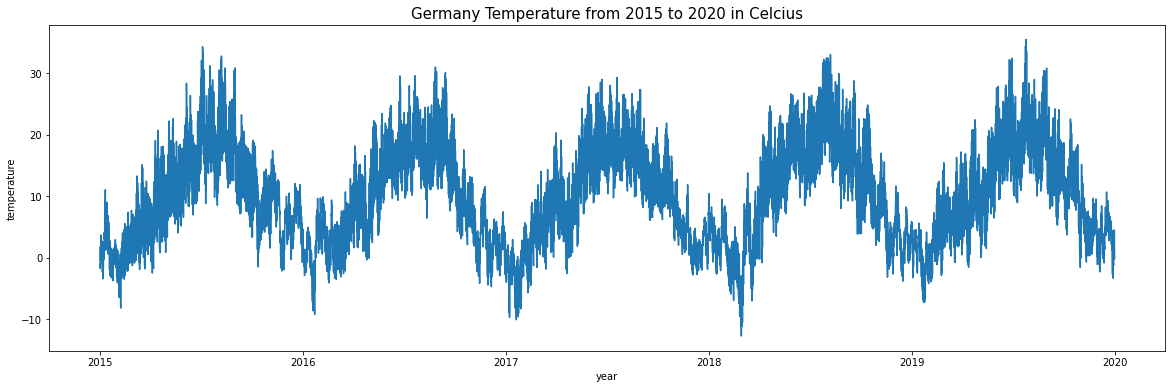

In [8]:
def get_year(df):
    return df.utc_timestamp[:4]
weather['year'] = weather.apply(get_year, axis = 1)
weather_new = weather[weather['year']>'2014']
date = pd.to_datetime(weather_new["utc_timestamp"])
value = weather_new["DE_temperature"]
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(date, value);
ax.set_title("Germany Temperature from 2015 to 2020 in Celcius", fontsize = 15)
ax.set_xlabel("year", fontsize = 10)
ax.set_ylabel("temperature", fontsize = 10)

Text(0, 0.5, 'temperature')

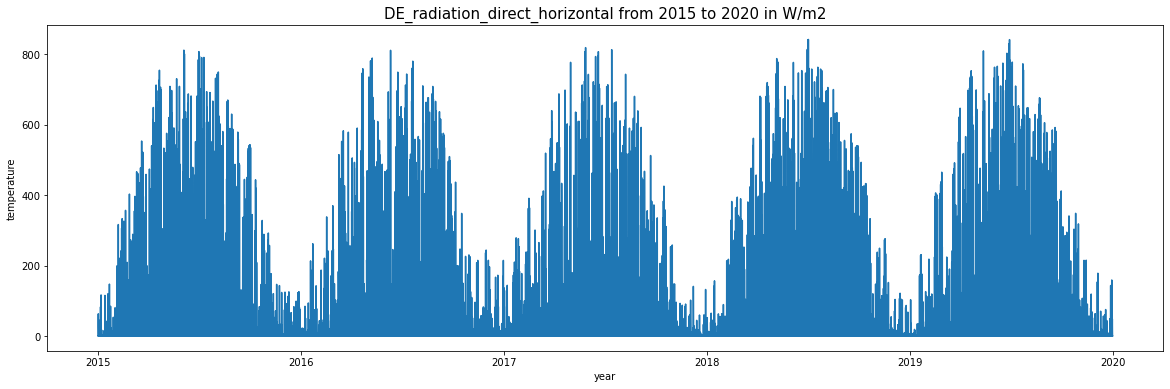

In [9]:
date = pd.to_datetime(weather_new["utc_timestamp"])
value = weather_new["DE_radiation_direct_horizontal"]
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(date, value);
ax.set_title("DE_radiation_direct_horizontal from 2015 to 2020 in W/m2", fontsize = 15)
ax.set_xlabel("year", fontsize = 10)
ax.set_ylabel("temperature", fontsize = 10)

Text(0, 0.5, 'temperature')

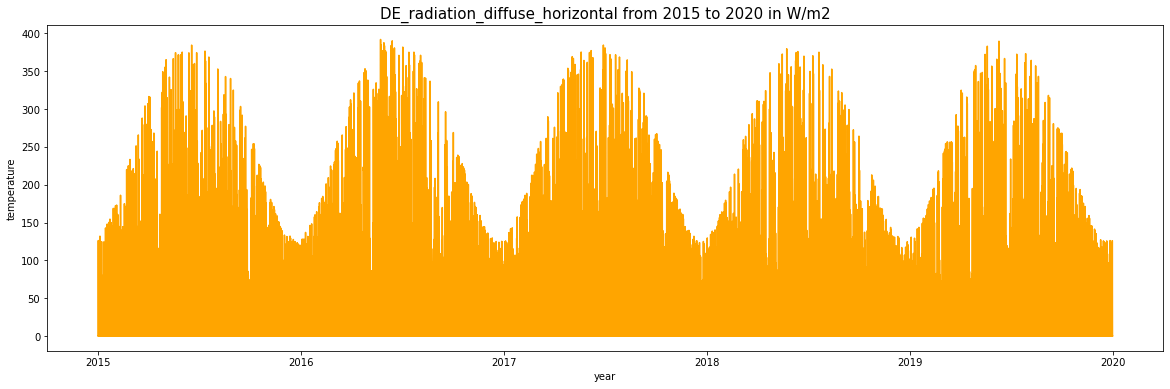

In [10]:
date = pd.to_datetime(weather_new["utc_timestamp"])
value = weather_new["DE_radiation_diffuse_horizontal"]
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(date, value, color='orange');
ax.set_title("DE_radiation_diffuse_horizontal from 2015 to 2020 in W/m2", fontsize = 15)
ax.set_xlabel("year", fontsize = 10)
ax.set_ylabel("temperature", fontsize = 10)

Text(0, 0.5, 'temperature')

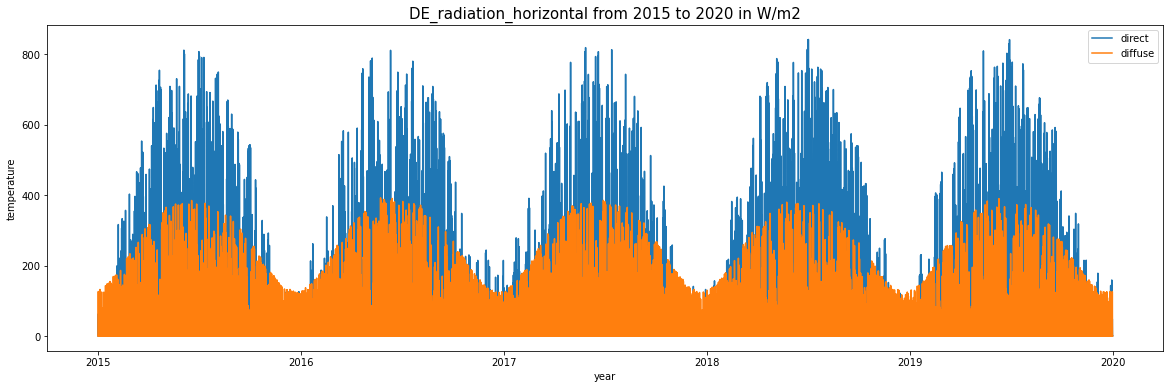

In [11]:
date = pd.to_datetime(weather_new["utc_timestamp"])
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(date, weather_new["DE_radiation_direct_horizontal"], label='direct');
ax.plot(date, weather_new["DE_radiation_diffuse_horizontal"], label='diffuse');
ax.set_title("DE_radiation_horizontal from 2015 to 2020 in W/m2", fontsize = 15)
ax.legend()
ax.set_xlabel("year", fontsize = 10)
ax.set_ylabel("temperature", fontsize = 10)

After preprocessed and cleaned data, we start to visualize the `temperature`, `radiation_direct_horizontal`, and, `radiation_diffuse_horizontal`. We could observe the following characteristics.

All three features share the seasonal pattern every year. Temperature and radiations are low in winter and high in summer.

- **temperature**: The temperature has a seasonal pattern. The general trend is consistent and obvious.

- **radiation_direct_horizontal**: The direct horizontal radiation has a seasonal pattern. Higher than diffuse radiation in summer and lower than diffuse radiation in winter.
- **radiation_diffuse_horizontal**: The diffuse horizontal radiation has a seasonal pattern. Higher than diffuse radiation in winter and lower than diffuse radiation in summer.



Text(0, 0.5, 'temperature')

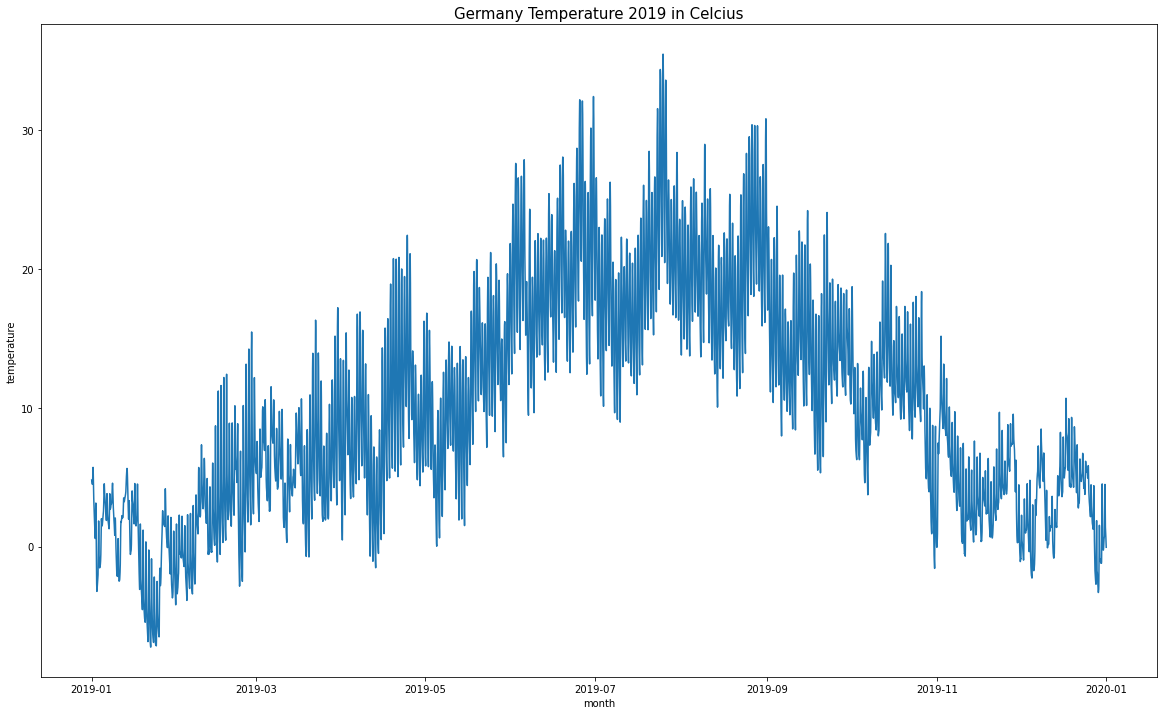

In [12]:
# Narrow down to visualization to a single year and get detailed characteristics.
weather_cut = weather[weather['year']=='2019']
date = pd.to_datetime(weather_cut["utc_timestamp"])
value = weather_cut["DE_temperature"]
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(date, value);
ax.set_title("Germany Temperature 2019 in Celcius", fontsize = 15)
ax.set_xlabel("month", fontsize = 10)
ax.set_ylabel("temperature", fontsize = 10)

Text(0, 0.5, 'temperature')

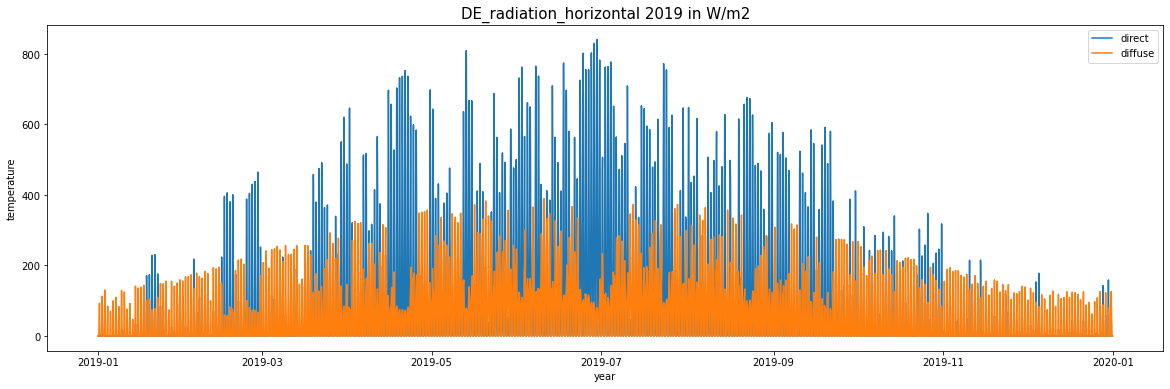

In [13]:
date = pd.to_datetime(weather_cut["utc_timestamp"])
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(date, weather_cut["DE_radiation_direct_horizontal"], label='direct');
ax.plot(date, weather_cut["DE_radiation_diffuse_horizontal"], label='diffuse');
ax.set_title("DE_radiation_horizontal 2019 in W/m2", fontsize = 15)
ax.legend()
ax.set_xlabel("year", fontsize = 10)
ax.set_ylabel("temperature", fontsize = 10)

When focuses in a single year. We could observe a better comparison and seasonal pattern.

- **temperature**: The temperature still shows a seasonal pattern while the temperature difference within a week could be more than 10 degree Celcius.

- **radiation_direct_horizontal**: Higher than diffuse radiation when the temperature is more than 10 degree celcius or comparatively higher within a weekly interval. 
- **radiation_diffuse_horizontal**: Higher than diffuse radiation when the temperature is lower than 10 degree celcius or comparatively lower within a weekly interval.

The diffuse radiation changes less significantly while the direct radiation changes a lot at different temperature. Those two variable could explain the seasonal radiation energy pattern in our reinforcement learning model.
